In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)
import unicodedata

from pandas import DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
np.set_printoptions(threshold='nan')

import math
from __future__ import division

In [2]:
df = pd.read_csv('train.tsv', sep='\t', index_col =None)
df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Label,Id
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,10101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,10102
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,10103
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,10104
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,10105
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1,10106
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1,10107
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1,10108
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1,10109
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2,10110


In [3]:
good = df[df["Label"]==1]    #good
bad = df[df["Label"]==2]    #bad

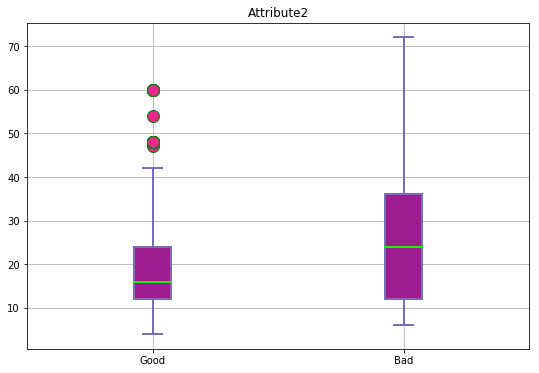

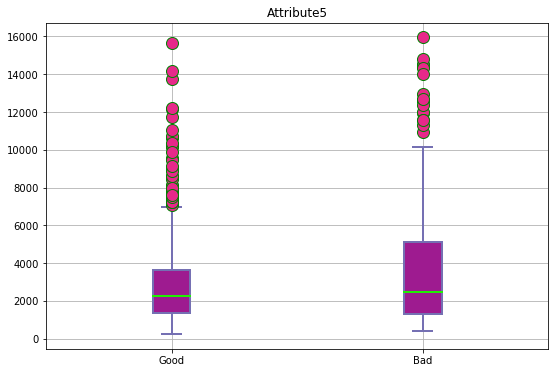

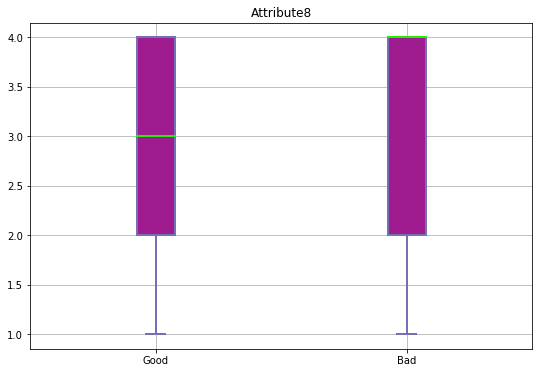

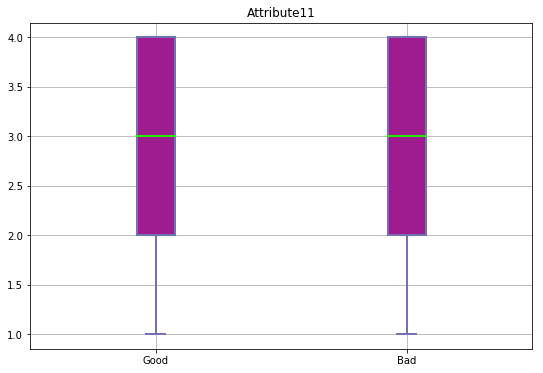

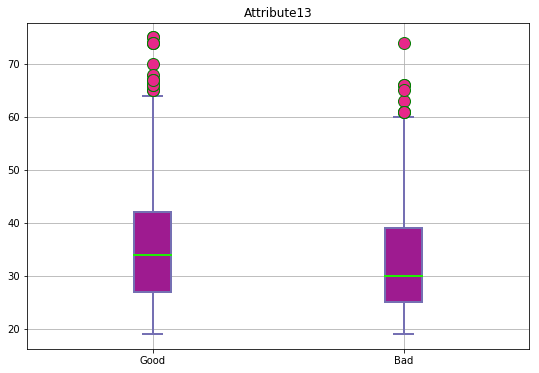

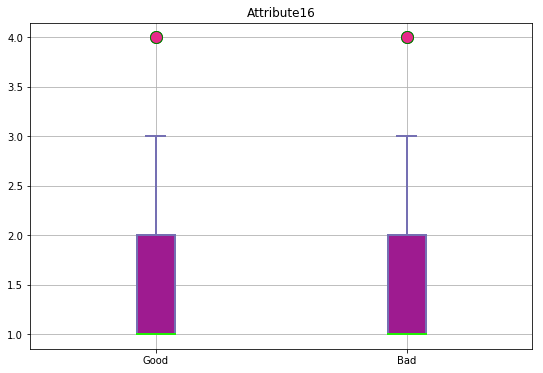

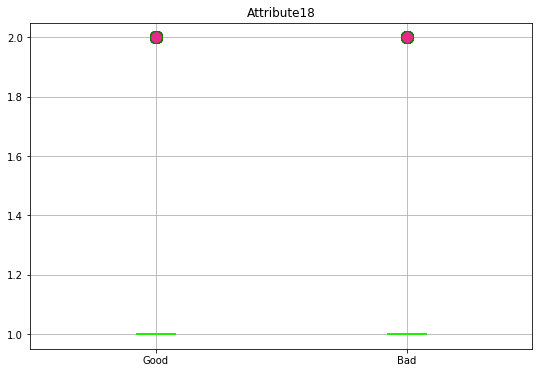

In [4]:
#Numericals
Attributes = ["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]

for attribute in Attributes: 
    Attribute_good = good[[attribute]]
    Attribute_bad = bad[[attribute]]
    
    #convert data into list
    Attribute2_good = list(Attribute_good.values.flatten())
    Attribute2_bad = list(Attribute_bad.values.flatten())
    
    
    data_to_plot = [Attribute2_good, Attribute2_bad]

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)


    # Create the boxplot
    ## change the style of fliers and their fill
    flierprops = dict(marker='o', markerfacecolor='#e7298a', markersize=12,
                  linestyle='none', markeredgecolor='g') 
    
    #Create the boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True, flierprops= flierprops)
    
    #Change color

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#9e1b90' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#20ef04', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
     #   flier.set(marker='o', color='#e7298a', alpha=0.5)
        
      

    #Set grid
    ax.grid()

    #Set labels
    ax.set_xticklabels(['Good', 'Bad'])    

    #Set title
    plt.title(attribute)
    plt.show()

    # Save the figure
    #fig.savefig('fig1.png', bbox_inches='tight')


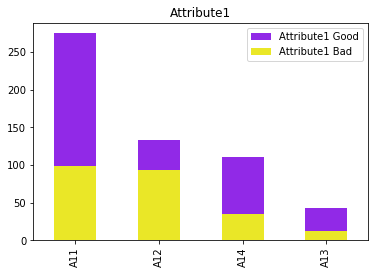

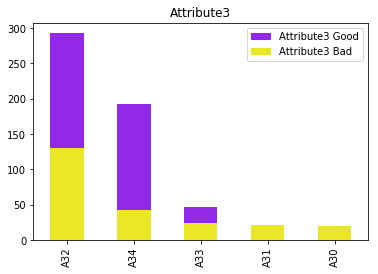

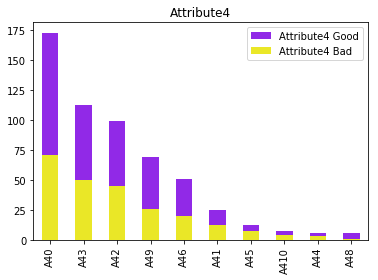

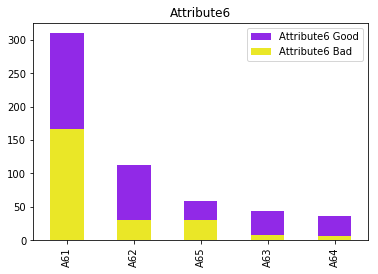

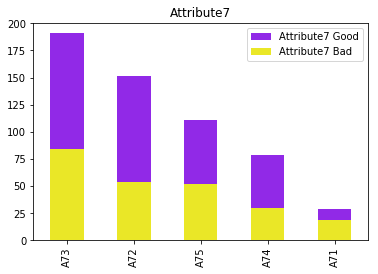

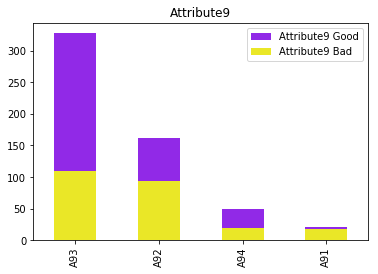

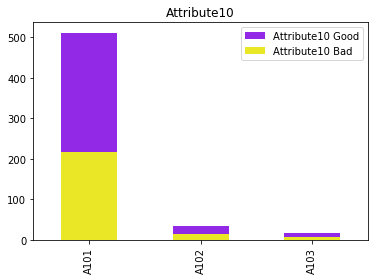

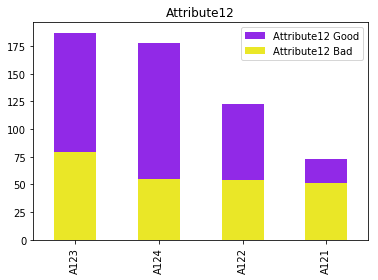

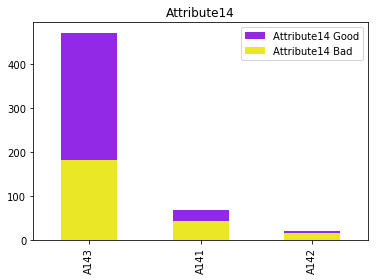

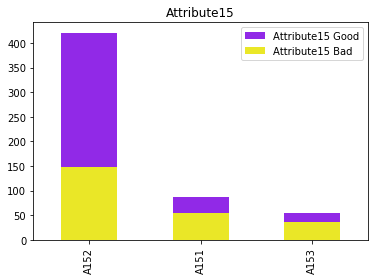

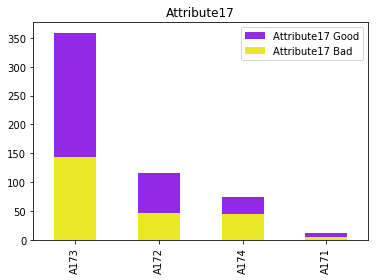

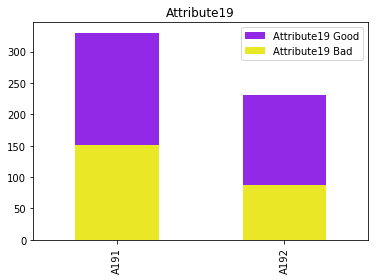

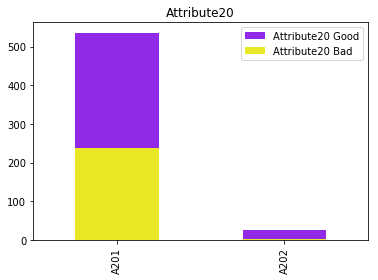

In [5]:
#for categorical data


attributesCategorical = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10'
              ,'Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20']

for item in attributesCategorical:

    attributeGood = pd.Series(good[item])
    attributeBad = pd.Series(bad[item])
    stringGood = item + " Good"
    stringBad = item + " Bad"

    plt.title(item)
    attributeGood.value_counts().plot(kind='bar',label= stringGood, color = '#9129e7' )
    attributeBad.value_counts().plot(kind='bar',label= stringBad, color = '#eae727')
    plt.legend()
    plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

withoutLabel = df.ix[:, df.columns != 'Label' ]
withoutLabelAndId = withoutLabel.ix[:, withoutLabel.columns != 'Id' ]

Count_Row = withoutLabelAndId.shape[0]

listOfDocuments= []
for i in range(Count_Row):
    documents = withoutLabelAndId.iloc[i]
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocuments.append(documents)
    
    
tupleOfDocuments = tuple(listOfDocuments)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tupleOfDocuments)

#SVD
tfidf_matrix = np.array(TruncatedSVD(n_components=10).fit_transform(tfidf_matrix))
print tfidf_matrix


[[  3.50617354e-01   1.06764153e-01  -1.60980099e-01   1.11451286e-01
   -1.12258500e-01  -1.93726212e-02  -1.18003511e-02  -2.32132289e-02
   -8.46530565e-02  -9.41338554e-02]
 [  4.04793700e-01  -1.90607315e-01  -5.39465938e-03   1.89368441e-02
    1.42998500e-01  -1.91700771e-01  -6.31151490e-02  -7.54578685e-04
   -6.65658738e-02   1.53620810e-03]
 [  3.67744346e-01  -6.36244807e-02  -1.85914961e-01   2.30556901e-01
   -3.90548159e-02   1.47350063e-01  -2.56278483e-02  -8.95414900e-02
    1.00350778e-01  -1.35439124e-02]
 [  3.20381605e-01  -6.51692947e-03   1.38162230e-01   1.26331511e-01
   -2.81519772e-02  -1.68441570e-02   1.20933824e-01   2.74412995e-01
    1.28358522e-02  -9.96869357e-02]
 [  3.46961593e-01   1.53996867e-01   1.72653819e-01   1.73876590e-01
    3.49315067e-03  -1.26072758e-01  -5.90927666e-03   2.27138864e-01
    1.32759114e-01   1.91260231e-01]
 [  3.50339279e-01   2.89573574e-01   2.74560392e-02   1.63276805e-01
   -8.43947362e-03  -7.81782492e-02  -1.04914

In [7]:
X = np.array(tfidf_matrix)
y = []
for i in range(Count_Row):
    y.append(df["Label"].iloc[i]) 
    

y = np.array(y)

print y

[1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2
 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *


random_state = np.random.RandomState(0)
k_fold = KFold(n_splits=10,shuffle = True)

clf = SVC(kernel = 'linear' , C = 1.0, probability=True, random_state=random_state)
clf.fit(X, y)
accuracySVM = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanSVM =np.mean(accuracySVM)
print "SVM"
print accuracySVM
print accuracyMeanSVM

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X, y)
accuracyRF = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanRF =np.mean(accuracyRF)
print "RF"
print accuracyRF
print accuracyMeanRF

clf = GaussianNB()
clf.fit(X, y)
accuracyNB = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanNB =np.mean(accuracyNB)
print "NB"
print accuracyNB
print accuracyMeanNB


SVM
[ 0.7625  0.6625  0.725   0.7125  0.7375  0.725   0.6     0.7     0.7125
  0.675 ]
0.70125
RF
[ 0.7125  0.725   0.725   0.6125  0.75    0.6625  0.7875  0.7625  0.6875
  0.625 ]
0.705
NB
[ 0.8125  0.8125  0.65    0.6625  0.6875  0.6625  0.7375  0.675   0.675
  0.7625]
0.71375


In [9]:
import csv

with open('EvaluationMetric_10fold.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Statistic Measure', 'Naive Bayes', 'Random Forest', 'SVM'),
         (' ','Accuracy', accuracyMeanNB, accuracyMeanRF, accuracyMeanSVM)]
    writer.writerows(l)
    
evalDf = pd.read_csv('EvaluationMetric_10fold.csv',sep='\t',encoding="utf-8",index_col=0)
evalDf

,Statistic Measure,Naive Bayes,Random Forest,SVM
,,,,
,Accuracy,0.71375,0.705,0.70125


In [10]:
dfTest = pd.read_csv('test.tsv',sep='\t',encoding="utf-8")

withoutId = dfTest.ix[:, dfTest.columns != 'Id' ]

withoutId

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A12,18,A34,A43,1795,A61,A75,3,A92,A103,4,A121,48,A141,A151,2,A172,1,A192,A201
1,A11,20,A34,A42,4272,A61,A75,1,A92,A101,4,A122,24,A143,A152,2,A173,1,A191,A201
2,A14,12,A34,A43,976,A65,A75,4,A93,A101,4,A123,35,A143,A152,2,A173,1,A191,A201
3,A12,12,A32,A40,7472,A65,A71,1,A92,A101,2,A121,24,A143,A151,1,A171,1,A191,A201
4,A11,36,A32,A40,9271,A61,A74,2,A93,A101,1,A123,24,A143,A152,1,A173,1,A192,A201
5,A12,6,A32,A43,590,A61,A72,3,A94,A101,3,A121,26,A143,A152,1,A172,1,A191,A202
6,A14,12,A34,A43,930,A65,A75,4,A93,A101,4,A121,65,A143,A152,4,A173,1,A191,A201
7,A12,42,A31,A41,9283,A61,A71,1,A93,A101,2,A124,55,A141,A153,1,A174,1,A192,A201
8,A12,15,A30,A40,1778,A61,A72,2,A92,A101,1,A121,26,A143,A151,2,A171,1,A191,A201
9,A12,8,A32,A49,907,A61,A72,3,A94,A101,2,A121,26,A143,A152,1,A173,1,A192,A201


In [11]:
#figuring out categories for testSet

Count_RowTest = dfTest.shape[0]

listOfDocumentsTest= []
IdList = []
for i in range(Count_RowTest):
    documents = withoutId.iloc[i]
    IdList.append(dfTest['Id'].iloc[i])
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocumentsTest.append(documents)
    
tupleOfDocumentsTest = tuple(listOfDocumentsTest)    

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrixTest = tfidf_vectorizer.fit_transform(tupleOfDocumentsTest)

#SVD
tfidf_matrixTest = np.array(TruncatedSVD(n_components = 10).fit_transform(tfidf_matrixTest))


clf = GaussianNB()
clf.fit(X, y)

categories = clf.predict(tfidf_matrixTest)

TestList = []

for i in range(len(categories)):
    if (categories[i]==1):
         TestList.append("Good")
    elif (categories[i]==2):
         TestList.append("Bad")

FinalTestList = zip(IdList, TestList)

with open('testSet_Predictions.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Client_ID', 'Predicted_Label')]
    
    for item in FinalTestList:
        l.append((' ',item[0],item[1]))
         
    writer.writerows(l)
    
dfPredict = pd.read_csv('testSet_Predictions.csv',sep='\t',encoding="utf-8",index_col=0)
dfPredict    

,Client_ID,Predicted_Label
,,
,10902,Good
,10903,Good
,10904,Good
,10905,Good
,10906,Bad
,10907,Good
,10908,Good
,10909,Bad
,10910,Good


In [12]:
import math
from __future__ import division

firstFeature = df['Attribute1']
firstFeature = pd.Series(firstFeature)
#feature

secondFeature1 = df['Attribute2']
secondFeature = np.histogram(secondFeature1, bins=5, range=None, normed=False, weights=None)
secondFeature = pd.Series(secondFeature)    #Numerical needs to be transformed
#print secondFeature1
#print "woa"
#print secondFeature
#print "k"

#secondFeature = pd.qcut(secondFeature1, 5)
#print secondFeature
#print "haha"


probabilitiesFirst = np.array(firstFeature.value_counts()/800);

print probabilitiesFirst


entropiesFirst = []
for i in range(len(probabilitiesFirst)):
    mathem = -probabilitiesFirst[i]*math.log(probabilitiesFirst[i],2)    # -pi*log2(pi)
    entropiesFirst.append(mathem)

parentEntropy = sum(entropiesFirst)
print parentEntropy


#infoGain = parentEntropy - average entropy children



#infoGain = parentEntropy - sumEntropies   #auto edo 8elei ftiaksimo
#infoGain

[ 0.3875   0.2825   0.26125  0.06875]
1.81664137229


Attribute1
     Attribute2 Attribute3 Attribute4  Attribute5 Attribute6 Attribute7  \
0    6           A34        A43        1169        A65        A75         
1    48          A32        A43        5951        A61        A73         
2    12          A34        A46        2096        A61        A74         
3    42          A32        A42        7882        A61        A74         
4    24          A33        A40        4870        A61        A73         
5    36          A32        A46        9055        A65        A73         
6    24          A32        A42        2835        A63        A75         
7    36          A32        A41        6948        A61        A73         
8    12          A32        A43        3059        A64        A74         
9    30          A34        A40        5234        A61        A71         
10   12          A32        A40        1295        A61        A72         
11   48          A32        A49        4308        A61        A72         
12   12       

In [14]:
def entropy(num1,num2):
    a = num1/(num1+num2)
    b = num2/(num1+num2)
    mathem = -a*math.log(a,2) -b*math.log(b,2)
    return mathem

In [25]:
entropy(561,239)

0.87975753726356

In [27]:
Count_Row = df.shape[0]
print Count_Row

labelFeature = df['Label']
#labelFeature = pd.Series(labelFeature)
#feature

counts = np.array(labelFeature.value_counts());

print counts

parentEntropy = entropy(counts[0],counts[1])
       
print parentEntropy

800
[561 239]
0.879757537264


In [149]:
attributesCategorical = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10'
              ,'Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20']

#attributesCategorical = ['Attribute1']
infoGain = []
for attribute in attributesCategorical:   
    
    rating_probs = df.groupby(attribute).size().div(len(df))
   
    probabilities = []
     
    for k,v in rating_probs.iteritems():
        if v>0:
            probabilities.append((k,v))
            
        


    a = df.groupby([attribute,'Label']).size()

    keys = list([a.keys()[x][0] for x in range(len(a.keys()))])

    values = list([i for i in a])

    allVal = zip(keys,values)

    terms =[]

    r = zip(allVal,allVal[1:])[::2]
    
    counter=0
   
    for i in r:
        
        entr1 = entropy(i[0][1],i[1][1])
        result = probabilities[counter][1]*entr1
        terms.append(result)
        counter+=1

    entropyAttr = sum(terms)
    numAttribute = attribute.replace('Attribute', '')
    numAttribute = int(numAttribute)


    infoGain.append(((parentEntropy - entropyAttr),numAttribute))
print infoGain

[(0.093827963023455085, 1), (0.037889406221516153, 3), (0.026897452033083691, 4), (0.022198966052434321, 6), (0.014547865230223334, 7), (0.012746841156174415, 9), (0.0056743997901600451, 10), (0.014905530877295625, 12), (0.007041506325139113, 14), (0.011618886823694607, 15), (0.0029403166312881313, 17), (0.0012028625910776025, 19), (0.0077043865464361261, 20)]


In [150]:
AttributesNumerical = ["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]
group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

#AttributesNumerical = ["Attribute16"]
for attribute in AttributesNumerical:  
     
    feature = df[attribute]
    attributeCut = pd.cut(feature, 5, labels = group_names)

    d = {attribute : pd.Series(attributeCut),
            'Label' : pd.Series(df['Label'])}

    d = pd.DataFrame(d)   #correct


    a = d.groupby([attribute,'Label']).size()  

    rating_probs = d.groupby(attribute).size().div(len(d))

    
    probabilities = []
    
    
    for k,v in rating_probs.iteritems():
        if v>0:
            probabilities.append((k,v))


    keys = list([a.keys()[x][0] for x in range(len(a.keys()))])

    values = list([i for i in a])

    allVal = zip(keys,values)

    terms =[]

    r = zip(allVal,allVal[1:])[::2]

    
    for i in range(len(r)):

        entr2 = entropy(r[i][0][1],r[i][1][1])
        result = probabilities[i][1]*entr2

        terms.append(result)


    entropyAttr = sum(terms)
    
    numAttribute = attribute.replace('Attribute', '')
    numAttribute = int(numAttribute)

    infoGain.append(((parentEntropy - entropyAttr),numAttribute))
print infoGain

[(0.093827963023455085, 1), (0.037889406221516153, 3), (0.026897452033083691, 4), (0.022198966052434321, 6), (0.014547865230223334, 7), (0.012746841156174415, 9), (0.0056743997901600451, 10), (0.014905530877295625, 12), (0.007041506325139113, 14), (0.011618886823694607, 15), (0.0029403166312881313, 17), (0.0012028625910776025, 19), (0.0077043865464361261, 20), (0.032963429423077617, 2), (0.018461146132255801, 5), (0.0073305000768301154, 8), (0.00022057134927411237, 11), (0.013412980532995777, 13), (0.002395770112591733, 16), (0.00012966570192785021, 18)]


In [153]:
sortInfoGain = sorted(infoGain, key=lambda x: x[1])
print sortInfoGain
print "Value"
sortInfoGainValue = sorted(infoGain, key=lambda x: x[0])
print sortInfoGainValue


[(0.093827963023455085, 1), (0.032963429423077617, 2), (0.037889406221516153, 3), (0.026897452033083691, 4), (0.018461146132255801, 5), (0.022198966052434321, 6), (0.014547865230223334, 7), (0.0073305000768301154, 8), (0.012746841156174415, 9), (0.0056743997901600451, 10), (0.00022057134927411237, 11), (0.014905530877295625, 12), (0.013412980532995777, 13), (0.007041506325139113, 14), (0.011618886823694607, 15), (0.002395770112591733, 16), (0.0029403166312881313, 17), (0.00012966570192785021, 18), (0.0012028625910776025, 19), (0.0077043865464361261, 20)]
Value
[(0.00012966570192785021, 18), (0.00022057134927411237, 11), (0.0012028625910776025, 19), (0.002395770112591733, 16), (0.0029403166312881313, 17), (0.0056743997901600451, 10), (0.007041506325139113, 14), (0.0073305000768301154, 8), (0.0077043865464361261, 20), (0.011618886823694607, 15), (0.012746841156174415, 9), (0.013412980532995777, 13), (0.014547865230223334, 7), (0.014905530877295625, 12), (0.018461146132255801, 5), (0.0221

In [ ]:
dfAttr = pd.read_csv('train.tsv',sep='\t',encoding="utf-8")

dfAttr = dfAttr.ix[:, dfAttr.columns != 'Id' ]
dfAttr = dfAttr.ix[:, dfAttr.columns != 'Label' ]
#dfAttrInitial = dfAttr

accuracyMeanList = []

Attributes = ["Attribute1","Attribute2","Attribute3","Attribute4","Attribute5","Attribute6","Attribute7","Attribute8","Attribute9","Attribute10","Attribute11","Attribute12","Attribute13","Attribute14","Attribute15","Attribute16","Attribute17","Attribute18","Attribute19"]
for attribute in Attributes:

    #dfAttr = dfAttrInitial.ix[:, dfAttrInitial.columns != attribute ]
    dfAttr = dfAttr.ix[:, dfAttr.columns != attribute ]
    print attribute
    print dfAttr

    Count_RowAttr = dfAttr.shape[0]

    listOfDocumentsAttr= []
    for i in range(Count_RowAttr):
        documents = dfAttr.iloc[i]
        documents = documents.to_string(index=False , header = False).encode('utf8')
        listOfDocumentsAttr.append(documents)


    tupleOfDocumentsAttr = tuple(listOfDocumentsAttr)


    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrixAttr = tfidf_vectorizer.fit_transform(tupleOfDocuments)

    #SVD
    tfidf_matrixAttr = np.array(TruncatedSVD(n_components=10).fit_transform(tfidf_matrixAttr))

    X = np.array(tfidf_matrixAttr)
    y = []
    for i in range(Count_RowAttr):
        y.append(df["Label"].iloc[i]) 


    y = np.array(y)

    #print y


    k_fold = KFold(n_splits=10,shuffle = True)

    clf = GaussianNB()
    clf.fit(X, y)
    accuracyNB = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
    accuracyMeanNB =np.mean(accuracyNB)
    #print accuracyNB
    #print accuracyMeanNB
    accuracyMeanList.append(accuracyMeanNB)
    
print "accuracyMeanList" 
print accuracyMeanList